# IMDB reviews
## Clasificador de reviews de peliculas con Keras

Se recomienda no correr las celdas de la sección de experimentación junto con el resto del notebook ya que consume demasiada memoria RAM.

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers


2022-08-14 22:08:08.174254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-14 22:08:08.174283: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# descarga del dataset de reviews de IMDB
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)  # los indices de las palabras no exeden 10000


In [4]:
train_data


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
# review con el mayor numero de palabras
sorted([len(x) for x in train_data], reverse=True)[0]


2494

In [5]:
# review con el menor numero de palabras
sorted([len(x) for x in train_data])[0]


11

In [6]:
words = imdb.get_word_index()  # diccionario de las palabras


1654784/1641221 [==============================] - 0s 0us/step


Decodificador de las palabras de las reviews

In [7]:
reverse_words = dict((indexes, words) for (words, indexes) in words.items())
review = " ".join(reverse_words.get(index - 3, "?") for index in train_data[0])
review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
train_data


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

#Procesamiento del input
Para que la información pueda ser procesada por una red neuronal es necesarrio ponerla en forma de tensor. Se pueden como primera opcion convertir los datos en un tensor de forma *(samples,word_indices)* para que pueda ser recibido por una red de tipo *embedding layer*. La segunda opcion es tranformar cada secuencia de indices en un vector de longitud 10000 que indique con 1s las palabras que aparecen en la review.

In [9]:
def vectorize_data(sequences):
    results = np.zeros((len(sequences), 10000))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


vectorize_data(train_data)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)


In [11]:
x_train


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
# se vectorizan los labels tambien
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")


In [13]:
y_train


array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

#Construcción del modelo
Para la red neuronal utilizaran 3 capas en total, de tipo *dense*, las primeras dos con 16 dimensiones(neuronas) y activación *relu*; mientras que la tercera tendra una unica dimension y activación *sigmoid* para representar la probabilidad de que la review sea positiva. 

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [15]:
model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)  # configuracion del optimizer y loss function


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Entrenamiento
*Mini-batch stochastic gradient descent*

20 epochs con batch_size = 512 y 10000 datos de validacion para las metricas

In [17]:
history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)


Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5150 - accuracy: 0.7852 - val_loss: 0.4233 - val_accuracy: 0.8223
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3078 - accuracy: 0.9008 - val_loss: 0.3056 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2265 - accuracy: 0.9261 - val_loss: 0.2825 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1785 - accuracy: 0.9420 - val_loss: 0.2775 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1432 - accuracy: 0.9568 - val_loss: 0.2881 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1189 - accuracy: 0.9639 - val_loss: 0.2909 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0957 - accuracy: 0.9729 - val_loss: 0.3300 - val_accuracy: 0.8741
Epoch 8/20
30

In [18]:
hist_dict = history.history
hist_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Resultados

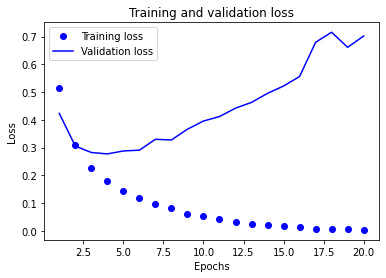

In [19]:
import matplotlib.pyplot as plt

loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
acc = hist_dict["accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


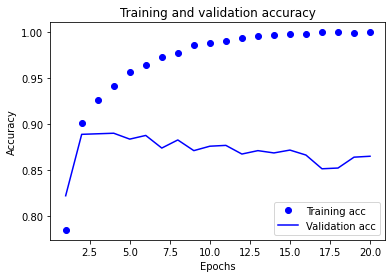

In [20]:
plt.clf()
acc_values = hist_dict["accuracy"]
val_acc_values = hist_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


Como se puede observar los resultados de *loss* y *accuracy* en los datos de entrenamiento se comportan de manera deseable. Sin embargo, para los datos de testing, a partir aproximadamente el 4 *epoch*, el desempeño del modelo no mejora. Por lo tanto, se entrenara el modelo nuevamenete por solo 4 *epochs*.

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/4
30/30 [==============================] - 2s 47ms/step - loss: 0.5219 - accuracy: 0.7857 - val_loss: 0.4043 - val_accuracy: 0.8567
Epoch 2/4
30/30 [==============================] - 1s 34ms/step - loss: 0.3126 - accuracy: 0.8979 - val_loss: 0.3070 - val_accuracy: 0.8860
Epoch 3/4
30/30 [==============================] - 1s 34ms/step - loss: 0.2261 - accuracy: 0.9274 - val_loss: 0.2798 - val_accuracy: 0.8904
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2931 - accuracy: 0.8816


[0.2930995225906372, 0.8816400170326233]

In [22]:
predictions = model.predict(x_test)  # predicciones de las reviews
predictions


array([[0.31690133],
       [0.99941325],
       [0.96471596],
       ...,
       [0.10063678],
       [0.19009325],
       [0.67952144]], dtype=float32)

In [23]:
y_test  # valores de las reviews


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

# Experimentación 


##1 *hidden layer*

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/4
30/30 [==============================] - 2s 47ms/step - loss: 0.4895 - accuracy: 0.7974 - val_loss: 0.4051 - val_accuracy: 0.8444
Epoch 2/4
30/30 [==============================] - 1s 35ms/step - loss: 0.3072 - accuracy: 0.9054 - val_loss: 0.3166 - val_accuracy: 0.8854
Epoch 3/4
30/30 [==============================] - 1s 35ms/step - loss: 0.2396 - accuracy: 0.9261 - val_loss: 0.2895 - val_accuracy: 0.8882
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3033 - accuracy: 0.8778


[0.3033403158187866, 0.8777599930763245]

## 3 *hidden layers*

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/4
30/30 [==============================] - 2s 50ms/step - loss: 0.5204 - accuracy: 0.7881 - val_loss: 0.3903 - val_accuracy: 0.8664
Epoch 2/4
30/30 [==============================] - 1s 36ms/step - loss: 0.3054 - accuracy: 0.9001 - val_loss: 0.3033 - val_accuracy: 0.8861
Epoch 3/4
30/30 [==============================] - 1s 36ms/step - loss: 0.2162 - accuracy: 0.9295 - val_loss: 0.2770 - val_accuracy: 0.8927
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2952 - accuracy: 0.8823


[0.2952054440975189, 0.8822799921035767]

##32 dimensiones 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/4
30/30 [==============================] - 3s 62ms/step - loss: 0.4910 - accuracy: 0.7855 - val_loss: 0.3426 - val_accuracy: 0.8763
Epoch 2/4
30/30 [==============================] - 1s 45ms/step - loss: 0.2685 - accuracy: 0.9064 - val_loss: 0.2916 - val_accuracy: 0.8841
Epoch 3/4
30/30 [==============================] - 1s 44ms/step - loss: 0.1972 - accuracy: 0.9301 - val_loss: 0.2737 - val_accuracy: 0.8911
Epoch 4/4
30/30 [==============================] - 1s 43ms/step - loss: 0.1528 - accuracy: 0.9485 - val_loss: 0.2863 - val_accuracy: 0.8866


##Mean squared error as loss function

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


## *tanh* activation function

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="tanh", input_shape=(10000,)))
model.add(layers.Dense(16, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)
